# Active cases to date

Draw plot for 10 countries, which has the most active cases to current date

In [ ]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime


plt.rcParams['figure.figsize'] = [40, 40]
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 15)
data_confirmed = pd.read_csv("./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
data_deaths = pd.read_csv("./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
data_recovered = pd.read_csv("./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
data_confirmed = data_confirmed.groupby('Country/Region').sum()
data_confirmed.drop(['Lat', 'Long'], axis='columns', inplace=True)
data_confirmed = data_confirmed.iloc[:,:].stack().reset_index()
data_confirmed.columns = ['ccse_name', 'date', 'confirmed']

In [4]:
data_confirmed

,ccse_name,date,confirmed
0,Afghanistan,1/22/20,0
1,Afghanistan,1/23/20,0
2,Afghanistan,1/24/20,0
3,Afghanistan,1/25/20,0
4,Afghanistan,1/26/20,0
...,...,...,...
19630,Zimbabwe,5/1/20,40
19631,Zimbabwe,5/2/20,34
19632,Zimbabwe,5/3/20,34
19633,Zimbabwe,5/4/20,34


In [5]:
data_deaths = data_deaths.groupby('Country/Region').sum()
data_deaths.drop(['Lat', 'Long'], axis='columns', inplace=True)
data_deaths = data_deaths.iloc[:,:].stack().reset_index()
data_deaths.columns = ['ccse_name', 'date', 'deaths']
data_deaths

,ccse_name,date,deaths
0,Afghanistan,1/22/20,0
1,Afghanistan,1/23/20,0
2,Afghanistan,1/24/20,0
3,Afghanistan,1/25/20,0
4,Afghanistan,1/26/20,0
...,...,...,...
19630,Zimbabwe,5/1/20,4
19631,Zimbabwe,5/2/20,4
19632,Zimbabwe,5/3/20,4
19633,Zimbabwe,5/4/20,4


In [6]:
data_recovered = data_recovered.groupby('Country/Region').sum()
data_recovered.drop(['Lat', 'Long'], axis='columns')
data_recovered = data_recovered.stack().reset_index()

In [7]:
data_recovered = data_recovered.iloc[2:, :]

In [8]:
data_recovered.columns = ['ccse_name', 'date', 'recovered']

In [9]:
data_recovered.reset_index()
data_recovered

,ccse_name,date,recovered
2,Afghanistan,1/22/20,0.0
3,Afghanistan,1/23/20,0.0
4,Afghanistan,1/24/20,0.0
5,Afghanistan,1/25/20,0.0
6,Afghanistan,1/26/20,0.0
...,...,...,...
20004,Zimbabwe,5/1/20,5.0
20005,Zimbabwe,5/2/20,5.0
20006,Zimbabwe,5/3/20,5.0
20007,Zimbabwe,5/4/20,5.0


In [12]:
data_all = data_confirmed.merge(data_deaths, how='left', 
                               left_on=('ccse_name', 'date'), right_on=('ccse_name', 'date'))
data_all = data_all.merge(data_recovered, how='left',
                         left_on=('ccse_name', 'date'), right_on=('ccse_name', 'date'))
data_all['date'] = pd.to_datetime(data_all.date)
data_all = data_all[(data_all.confirmed != 0) & data_all.recovered != 0]
date_start = pd.to_datetime("2020-04-25")
date_end = pd.to_datetime(datetime.datetime.today().strftime('%Y-%m-%d')) - pd.to_timedelta(1, unit='d')
data_all = data_all[data_all.date > date_start]
data_all['recovered'] = data_all.recovered.astype('int64')

In [13]:
data_all['active_cases'] = data_all.confirmed - data_all.recovered
data_all

,ccse_name,date,confirmed,deaths,recovered,active_cases
95,Afghanistan,2020-04-26,1531,50,207,1324
96,Afghanistan,2020-04-27,1703,57,220,1483
97,Afghanistan,2020-04-28,1828,58,228,1600
98,Afghanistan,2020-04-29,1939,60,252,1687
99,Afghanistan,2020-04-30,2171,64,260,1911
...,...,...,...,...,...,...
19630,Zimbabwe,2020-05-01,40,4,5,35
19631,Zimbabwe,2020-05-02,34,4,5,29
19632,Zimbabwe,2020-05-03,34,4,5,29
19633,Zimbabwe,2020-05-04,34,4,5,29


In [16]:
"""Let's see which countries has more active cases at this day
Not include US due to huge difference in number of cases
"""


data_top_active_temp = data_all[data_all.date == date_end].sort_values(by='active_cases', axis='rows', ascending=False)
countries = list(data_top_active_temp.iloc[1:10,:].ccse_name)
countries

['United Kingdom',
 'Russia',
 'Italy',
 'France',
 'Spain',
 'Brazil',
 'Turkey',
 'Netherlands',
 'Belgium']

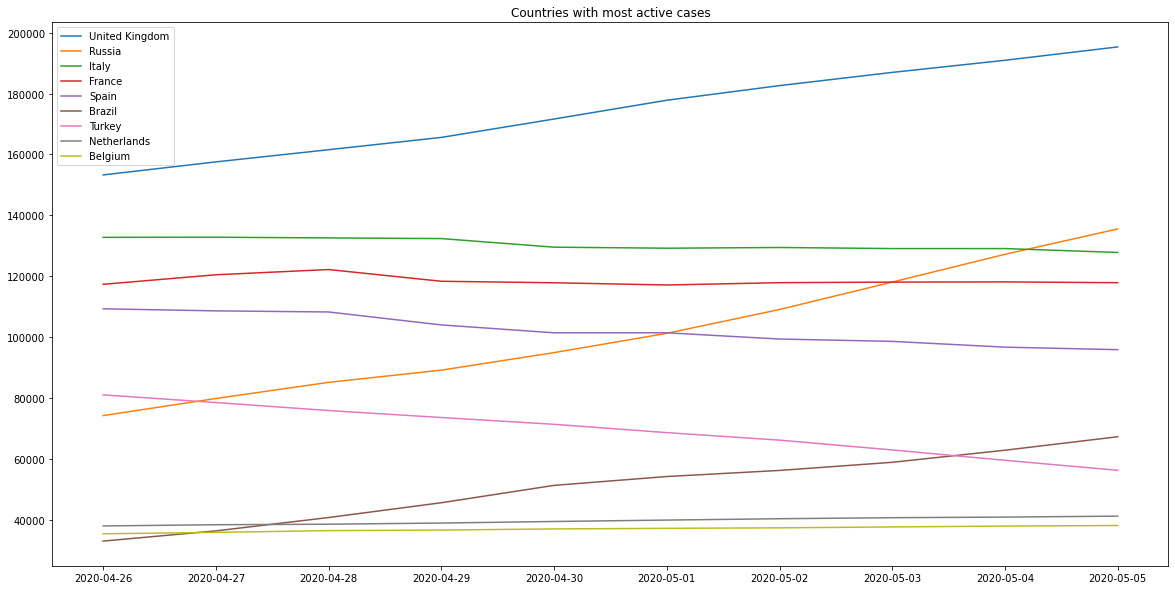

In [21]:
plt.figure(figsize=(20, 10))
plt.title('Countries with most active cases')
days = pd.date_range(date_start+pd.to_timedelta(1, unit='d'), date_end)
for country in countries:
    data = data_all[data_all.ccse_name == country]
    plt.plot(data.date, data.active_cases, label=country)
plt.legend()
    